In [3]:
# Cell 1 - Setup
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from .txt with pipe delimiter
df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", delimiter="|")

# Quick clean
df = df.dropna(subset=["Gender", "CoverType", "IsVATRegistered", "TotalPremium"])
df = df[df["TotalPremium"] > 0]  # remove rows with zero premium


C:\Users\henok\AppData\Local\Temp\ipykernel_2572\1835386905.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", delimiter="|")


In [5]:
# Cell 2 - Hypothesis 1: CoverType vs Gender (Chi-squared test)
contingency = pd.crosstab(df["CoverType"], df["Gender"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-squared Test")
print(f"Chi² = {chi2:.2f}, p = {p:.4f}")

if p < 0.05:
    print("Reject H₀: There is a significant relationship between CoverType and Gender.")
else:
    print("Fail to reject H₀: No significant relationship between CoverType and Gender.")


Chi-squared Test
Chi² = 4416.27, p = 0.0000
Reject H₀: There is a significant relationship between CoverType and Gender.


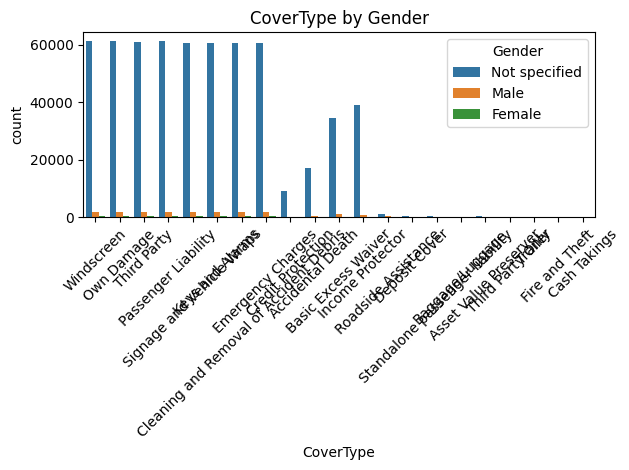

In [6]:
# Cell 3 - Visualize
sns.countplot(data=df, x="CoverType", hue="Gender")
plt.title("CoverType by Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Cell 4 - Hypothesis 2: TotalPremium by VAT Registration (t-test)
group1 = df[df["IsVATRegistered"] == True]["TotalPremium"]
group2 = df[df["IsVATRegistered"] == False]["TotalPremium"]

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print("\nT-Test: TotalPremium by VAT Registration")
print(f"t = {t_stat:.2f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: VAT status affects average premium.")
else:
    print("Fail to reject H₀: No significant effect of VAT status on premium.")



T-Test: TotalPremium by VAT Registration
t = -10.45, p = 0.0000
Reject H₀: VAT status affects average premium.


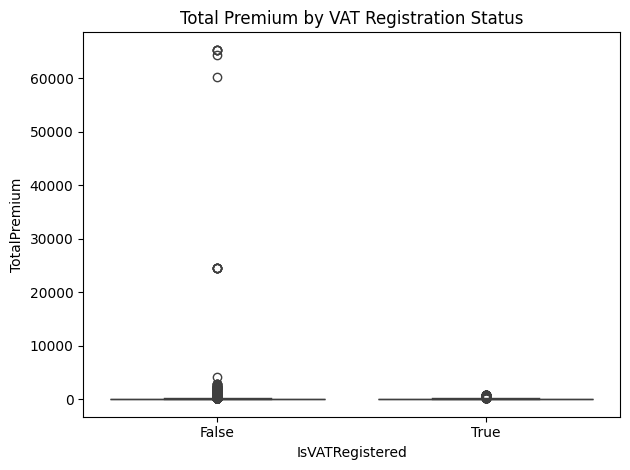

In [8]:
# Cell 5 - Visualize
sns.boxplot(data=df, x="IsVATRegistered", y="TotalPremium")
plt.title("Total Premium by VAT Registration Status")
plt.tight_layout()
plt.show()
